# Cuisine Combinations

## Importing necassary python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Dataset .csv")

In [3]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
data.columns=data.columns.str.strip()

In [6]:
data[["Cuisines","Aggregate rating"]].isnull().sum()

Cuisines            9
Aggregate rating    0
dtype: int64

In [10]:
data=data.dropna(subset=["Cuisines"])

 Normalize the 'Cuisines' column to handle cases with different separators or spaces 

In [11]:
data['Cuisines'] = data['Cuisines'].str.strip().str.lower()
data['Cuisines'] = data['Cuisines'].apply(lambda x: ','.join(sorted(x.split(', '))))


C:\Users\amish\AppData\Local\Temp\ipykernel_20396\3737953710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cuisines'] = data['Cuisines'].str.strip().str.lower()
C:\Users\amish\AppData\Local\Temp\ipykernel_20396\3737953710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cuisines'] = data['Cuisines'].apply(lambda x: ','.join(sorted(x.split(', '))))


In [13]:
cuisines_combinations=data["Cuisines"].value_counts().head(10)
cuisines_combinations

Cuisines
north indian                    936
chinese,north indian            616
mughlai,north indian            394
fast food                       354
chinese                         354
chinese,mughlai,north indian    306
cafe                            299
bakery                          218
bakery,desserts                 181
chinese,fast food               159
Name: count, dtype: int64

In [15]:
cuisines_rating=data.groupby("Cuisines")["Aggregate rating"].mean()
cuisines_rating

Cuisines
afghani                                   0.725
afghani,arabian,north indian,pakistani    0.000
afghani,chinese,indian,pakistani          4.100
afghani,chinese,mughlai                   0.000
afghani,curry,indian,pakistani            3.900
                                          ...  
tibetan                                   0.000
turkish                                   3.400
turkish pizza                             4.300
vietnamese                                4.050
world cuisine                             4.900
Name: Aggregate rating, Length: 1343, dtype: float64

In [17]:
common_cuisines_rating=cuisines_rating[cuisines_combinations.index]
common_cuisines_rating

Cuisines
north indian                    1.672329
chinese,north indian            2.333442
mughlai,north indian            2.767259
fast food                       2.118362
chinese                         2.042090
chinese,mughlai,north indian    2.619935
cafe                            2.890970
bakery                          1.924312
bakery,desserts                 2.375691
chinese,fast food               2.069811
Name: Aggregate rating, dtype: float64

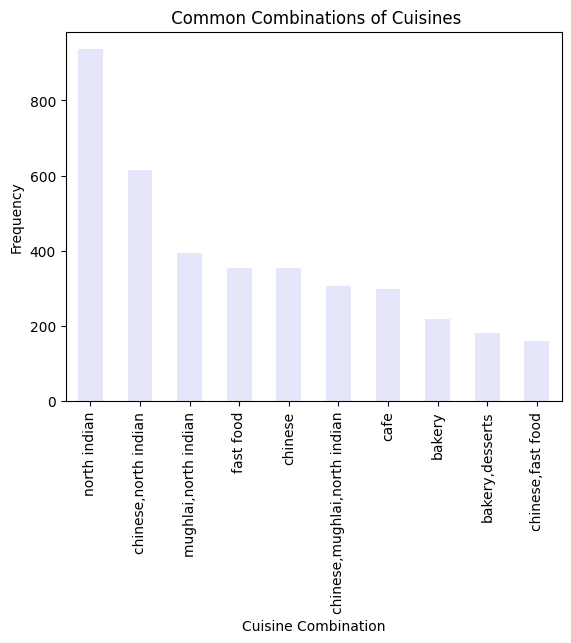

In [23]:
cuisines_combinations.plot(kind='bar', color='lavender')
plt.title(' Common Combinations of Cuisines')
plt.xlabel('Cuisine Combination')
plt.ylabel('Frequency')
plt.show()

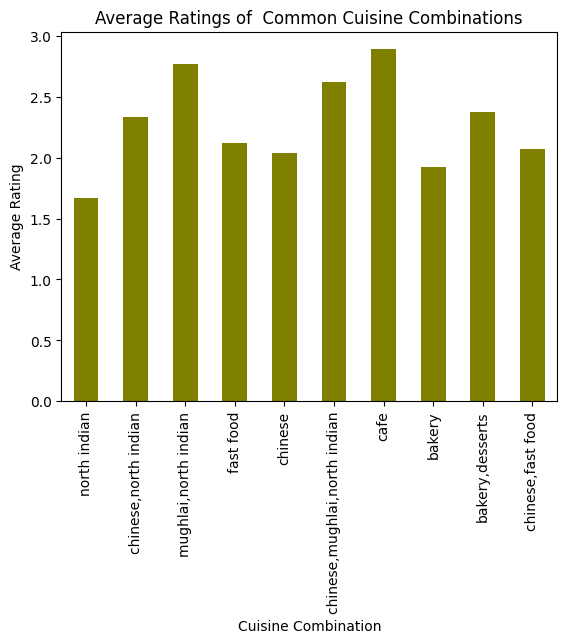

In [22]:
common_cuisines_rating.plot(kind='bar', color='olive')
plt.title('Average Ratings of  Common Cuisine Combinations')
plt.xlabel('Cuisine Combination')
plt.ylabel('Average Rating')
plt.show()

## SUMMARY

Inspect Column Names:

- Printing the column names helps verify that you have the correct column names in your dataset.

Normalize the 'Cuisines' Column:

- Convert all cuisine names to lowercase and sort them to handle different orderings. This step ensures that combinations like "Italian, Chinese" and "Chinese, Italian" are treated as the same.

Identify Most Common Combinations:

- Use value_counts() to find the most common combinations of cuisines.

Calculate Average Ratings:

- Group by the 'Cuisines' column and calculate the mean rating for each combination.

Visualize the Results:

- Use bar charts to visualize the most common combinations of cuisines and their corresponding average ratings.